['high_risk_tolerance', 'med_risk_tolerance', 'low_risk_tolerance']
['limited_investment_exp', 'no_investment_exp', 'good_investment_exp', 'extensive_investment_exp']
['very_important_liq_need', 'not_important_liq_need', 'somewhat_important_liq_need']
['Android', 'iOS', 'both']
['stock', 'etp', 'adr', 'wrt', 'mlp', '0', 'lp', 'rlt', 'reit', 'cef', 'tracking']
['med_time_horizon', 'short_time_horizon', 'long_time_horizon']
LR_auc score 0.5718387230514097
rf_auc score 0.5625829187396352
gb_auc score 0.5523217247097845
risk r:  0.146759876969716 p:  0.0014542269814421906
invest r:  -0.020964543890479755 p:  0.6510029602982125
liquidity r:  0.021351637440910537 p:  0.6449967600203986
platform r:  0.06765594123893719 p:  0.14391047980240465
time_s r:  -0.027735760906614535 p:  0.549488467624421
instrument r:  1.1440042489707647e-09 p:  0.9999999803065497
first r:  -0.12617154734930605 p:  0.006273387907935763
time_h r:  0.07858876764204378 p:  0.08946704424722239


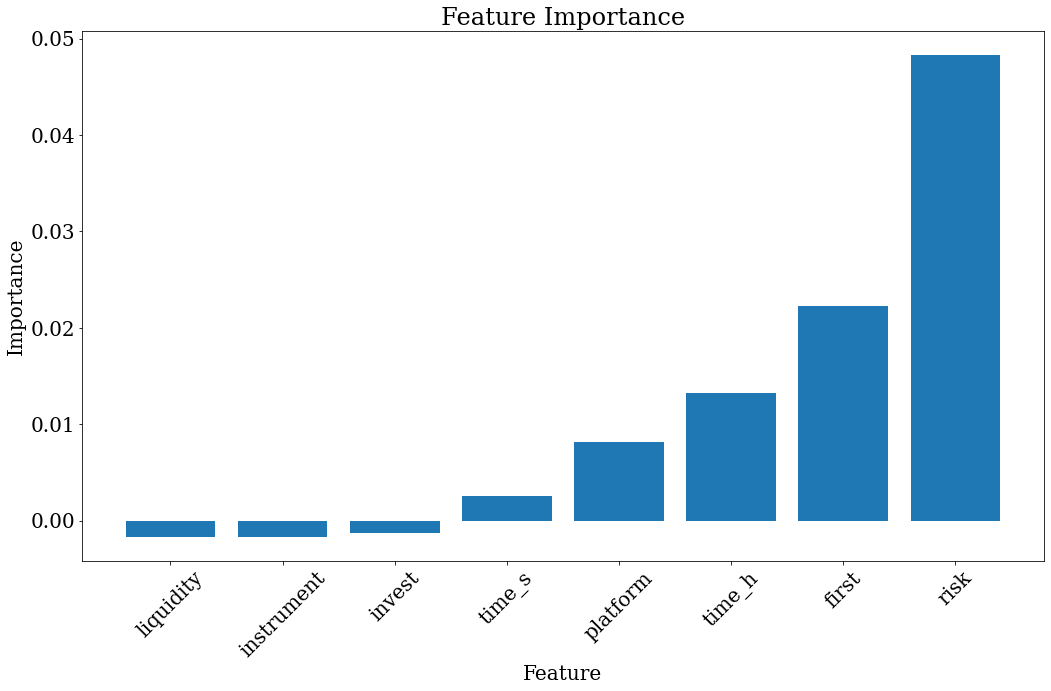

In [42]:
import pandas as pd
import numpy as np



features_data = pd.read_csv('features_data.csv')
features_data = features_data.to_numpy()

churn_user_id_path = 'churn_user_id.txt'
churn_user_id = []
with open(churn_user_id_path, 'r') as rf:
    for line in rf.readlines():
        id = line.strip()
        churn_user_id.append(id)


# we first go over each feature and quantify it
risk_tolerance = features_data[:, 0]
feature_pool = []
for i in range(len(risk_tolerance)):
    if risk_tolerance[i] not in feature_pool:
        feature_pool.append(risk_tolerance[i])
print(feature_pool)
risk_tolerance_feature = np.copy(risk_tolerance)
for i in range(len(feature_pool)):
    risk_tolerance_feature[risk_tolerance == feature_pool[i]] = i
    
risk_tolerance_for_show = np.copy(risk_tolerance_feature)
    
# we do the same thing for other features
investment_experience = features_data[:, 1]
feature_pool = []
for i in range(len(investment_experience)):
    if investment_experience[i] not in feature_pool:
        feature_pool.append(investment_experience[i])
print(feature_pool)
investment_experience_feature = np.copy(investment_experience)
for i in range(len(feature_pool)):
    investment_experience_feature[investment_experience == feature_pool[i]] = i


liquidity_needs = features_data[:, 2]
feature_pool = []
for i in range(len(liquidity_needs)):
    if liquidity_needs[i] not in feature_pool:
        feature_pool.append(liquidity_needs[i])
print(feature_pool)
liquidity_needs_feature = np.copy(liquidity_needs)
for i in range(len(feature_pool)):
    liquidity_needs_feature[liquidity_needs == feature_pool[i]] = i


platform = features_data[:, 3]
feature_pool = []
for i in range(len(platform)):
    if platform[i] not in feature_pool:
        feature_pool.append(platform[i])
print(feature_pool)
platform_feature = np.copy(platform)
for i in range(len(feature_pool)):
    platform_feature[platform == feature_pool[i]] = i


instrument_type_first_traded = features_data[:, 5]
feature_pool = []
for i in range(len(instrument_type_first_traded)):
    if instrument_type_first_traded[i] not in feature_pool:
        feature_pool.append(instrument_type_first_traded[i])
print(feature_pool)
instrument_type_first_traded_feature = np.copy(instrument_type_first_traded)
for i in range(len(feature_pool)):
    instrument_type_first_traded_feature[instrument_type_first_traded == feature_pool[i]] = i


time_horizon = features_data[:, 7]
feature_pool = []
for i in range(len(time_horizon)):
    if time_horizon[i] not in feature_pool:
        feature_pool.append(time_horizon[i])
print(feature_pool)
time_horizon_feature = np.copy(time_horizon)
for i in range(len(feature_pool)):
    time_horizon_feature[time_horizon == feature_pool[i]] = i


# concatenate all features
risk_tolerance_feature = np.array(risk_tolerance_feature)
# risk_tolerance_feature = risk_tolerance_feature[:, np.newaxis]
investment_experience_feature = np.array(investment_experience_feature)
# investment_experience_feature = investment_experience_feature[:, np.newaxis]
liquidity_needs_feature = np.array(liquidity_needs_feature)
# liquidity_needs_feature = liquidity_needs_feature[:, np.newaxis]
platform_feature = np.array(platform_feature)
# platform_feature = platform_feature[:, np.newaxis]
instrument_type_first_traded_feature = np.array(instrument_type_first_traded_feature)
# instrument_type_first_traded_feature = instrument_type_first_traded_feature[:, np.newaxis]
time_horizon_feature = np.array(time_horizon_feature)
# time_horizon_feature = time_horizon_feature[:, np.newaxis]

features_data[:, 0] = risk_tolerance_feature
features_data[:, 1] = investment_experience_feature
features_data[:, 2] = liquidity_needs_feature
features_data[:, 3] = platform_feature
features_data[:, 5] = instrument_type_first_traded_feature
features_data[:, 7] = time_horizon_feature

# normalization the features
features = features_data[:, :8].astype(np.float32)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
mean = np.reshape(mean, (1, -1))
std = np.reshape(std, (1, -1))

features = features - mean
features = features / std

# annotate the binary label
for i in range(np.shape(features_data)[0]):
    if features_data[i, 8] in churn_user_id:
        features_data[i, 8] = 1.0
    else:
        features_data[i, 8] = 0.0
features_data[:, :8] = features

# rectify features
rec_features = np.zeros(np.shape(features_data))
for i in range(np.shape(features_data)[1]):
    temp = features_data[:, i]
    temp = list(temp)
    temp = np.array(temp)
    rec_features[:, i] = temp
features_data = rec_features

# split the data
np.random.shuffle(features_data)

# we set 80% as the training and 20% test
train_rate = 0.8

train_feature = features_data[:int(train_rate*np.shape(features_data)[0]), :8]
train_label = features_data[:int(train_rate*np.shape(features_data)[0]), 8]
test_feature = features_data[int(train_rate*np.shape(features_data)[0]):, :8]
test_label = features_data[int(train_rate*np.shape(features_data)[0]):, 8]

# because this is a unbalanced problem, we do down-sampling
num_positive = int(np.sum(train_label))
idx_negative = np.where(train_label < 1.0)[0]
selected_idx_negative = idx_negative[:num_positive]
train_feature_negative = train_feature[selected_idx_negative, :]
train_label_negative = train_label[selected_idx_negative]
idx_positive = np.where(train_label > 0.0)[0]
train_feature_positive = train_feature[idx_positive, :]
train_label_positive = train_label[idx_positive]
train_feature = np.concatenate((train_feature_negative, train_feature_positive), axis=0)
train_label = np.concatenate((train_label_negative, train_label_positive), axis=0)
train_feature_data = np.concatenate((train_feature, np.reshape(train_label, (-1, 1))), axis=1)
np.random.shuffle(train_feature_data)
train_feature = train_feature_data[:, :8]
train_label = train_feature_data[:, 8]

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(train_feature, train_label)
auc_score = roc_auc_score(test_label, clf.predict_proba(test_feature)[:, 1])
print('LR_auc score', auc_score)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(train_feature, train_label)
y_pred = rf.predict(test_feature)

y_pred_proba = rf.predict_proba(test_feature)[::, 1]
fpr, tpr, _ = metrics.roc_curve(test_label, y_pred_proba)
auc = metrics.roc_auc_score(test_label, y_pred_proba)
print('rf_auc score', auc)

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_feature, train_label)
y_pred = gb.predict(test_feature)

y_pred_proba = gb.predict_proba(test_feature)[::, 1]
fpr, tpr, _ = metrics.roc_curve(test_label, y_pred_proba)
auc = metrics.roc_auc_score(test_label, y_pred_proba)
print('gb_auc score', auc)
 
    
#  --------- compute feature importance ---------------
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, train_feature, train_label)
sorted_idx = perm_importance.importances_mean.argsort()
# var_Name = ['risk_tolerance', 'investment_experience', 'liquidity_needs', 'platform', 'time_spent', 'instrument_type_first_traded', 'first_deposit_amount', 'time_horizon']

var_Name = ['risk', 'invest', 'liquidity', 'platform', 'time_s', 'instrument', 'first', 'time_h']
sorted_name = [var_Name[i] for i in sorted_idx]

font_size = 20
plt.rc('font', family='serif', size=font_size)
fig, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, bottom=0.2, top=0.99, right=0.95, left=0.2)

x_pos = np.arange(len(sorted_name))
performance = perm_importance.importances_mean[sorted_idx]
ax.bar(x_pos, performance, align='center',  capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_name)

# ax.invert_yaxis()  # labels read top-to-bottom
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.title('Feature Importance')
plt.xticks(rotation=45)
fig.tight_layout()


#  --------- compute the pearson correlation coefficient ---------------
from scipy.stats import pearsonr
for i in range(np.shape(train_feature)[1]):
    corr, p_value = pearsonr(np.squeeze(train_feature[:,i]), np.squeeze(train_label))
    print(var_Name[i], 'r: ', corr, 'p: ', p_value)

[Text(0, 0, 'Low'), Text(1, 0, 'Med'), Text(2, 0, 'High')]

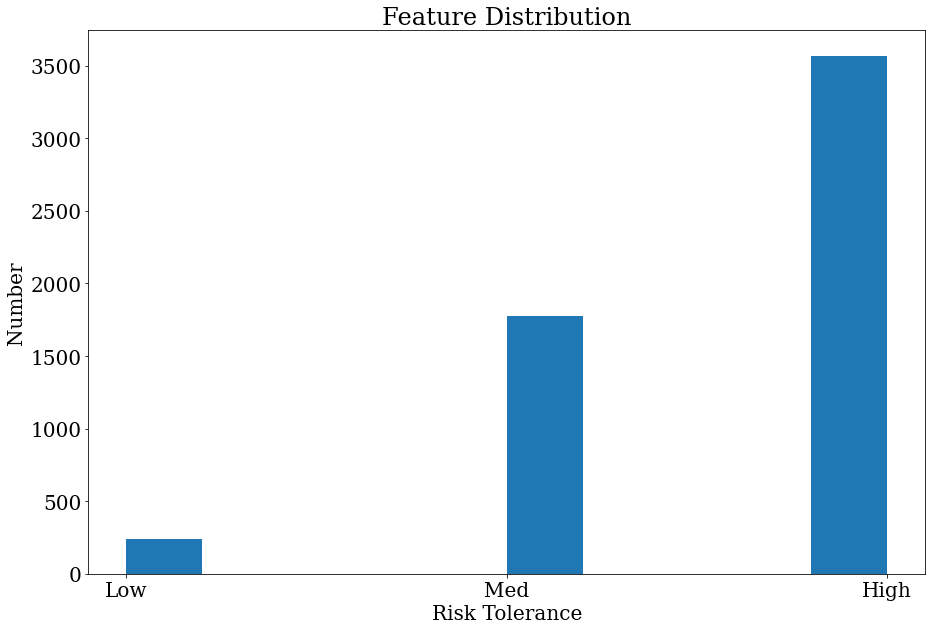

In [41]:
risk_tolerance_for_show = 2 - risk_tolerance_for_show
risk_tolerance = list(risk_tolerance_for_show)
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(risk_tolerance)
plt.ylabel("Number")
plt.xlabel("Risk Tolerance")
plt.title('Feature Distribution')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Low','Med','High'])